# НИР Лабораторная работа № 2

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib notebook

## Дискретное преобразование Фурье

$$ \hat{f}_{k} = \sum_{n=0}^{N-1} f_n \exp\Bigl( -\dfrac{2\pi i}{N} kn \Bigr),~~~~ k = \overline{0, N-1}$$

In [3]:
def discrete_transform(array, k_list):
    def Exp(n, k):
        return np.exp(-2 * np.pi * 1j * k * n / len(array))
    
    a = [np.sum([array[n] * Exp(n, k) for n in range(0, len(array))]) for k in k_list]
    
    return np.array(a)

### Постановка задачи

Построить дискретные сигналы $f_n$ и соответствующие спектральные плотности $|\hat{f}_k|$ на основе функций:

1) $f(t) = \cos\bigl(\omega_1 t\bigr) + \cos\bigl(\omega_2 t\bigr)$;

In [4]:
def func_1(times, w1=0.5, w2 = 2):
    return np.cos(w1 * times) + np.cos(w2 * times)

2) $f(t) = \bigl(1 - \Theta\bigl( t - t_* \bigr) \bigr) \cos\bigl(\omega_1 t\bigr) + \Theta\bigl( t - t_* \bigr)\cos\bigl(\omega_2 t\bigr)$;

In [46]:
def func_2(times, w1=0.5, w2 = 2, t_ = 2.5):

    return (1 - np.heaviside(times - t_, 1)) * np.cos(w1 * times) + np.heaviside(times - t_, 1) * np.cos(w2 * times)

3) $f(t) = \cos\bigl( \omega t \bigr)$, $\omega = \omega_1 + \bigl(\omega_2 - \omega_1 \bigr)t \bigl/T$.

In [37]:
def func_3(times, w1=0.5, w2=2):
    
    def omega(w1, w2, t, T=10):
        return w1 + (w2 - w1) * t / T
    
    return np.cos(omega(w1, w2, times) * times)

Невозможность отследить появление (исчезновение) или изменение частотных состовляющих сигнала следует из суммирования по всей временной реализации.

### Реализация

Сгенерируем временной ряд, для каждой из предложенных функций сигнала, на временом интервале $[0, 5]$ с шагом $h = 0.1$.

In [120]:
times = np.arange(0, 12, 0.05)

f1 = func_1(times, w1=5)
f2 = func_2(times)
f3 = func_3(times)

На основе полученных временных рядов построим спектральные плотности сигналов

In [121]:
k_list = range(0, len(times))

f1k = discrete_transform(f1, k_list)
f2k = discrete_transform(f2, k_list)
f3k = discrete_transform(f3, k_list)

Визуализируем полученные данные

In [124]:
def my_graphs(times, funcs, furies):
    plt.style.use('_mpl-gallery')
    
    fig, axs = plt.subplots(len(funcs), 2, figsize=(25, 7))
    
    axs[0][0].set_title('Дискретный сигнал')
    axs[0][1].set_title('Спектральная плотность')
    
    for row in range(len(funcs)):
        
        axs[row][0].stem(times, funcs[row])
        markerline, stemlines, baseline = axs[row][1].stem(times, np.abs(furies[row]), linefmt='#E74C3C')
        markerline.set_markerfacecolor('#E74C3C')
        markerline.set_markeredgecolor('#E74C3C')
        
        axs[row][0].set_ylabel(f'$f_{row + 1}(t)$', rotation=0, size=14, loc='top')
        axs[row][1].set_ylabel(f'$f_{row + 1}k$', rotation=0, size=14, loc='top')
        
    axs[-1][0].set_xlabel('time')
    axs[-1][1].set_xlabel('time')
    
    fig.tight_layout()
    plt.show()

<IPython.core.display.Javascript object>


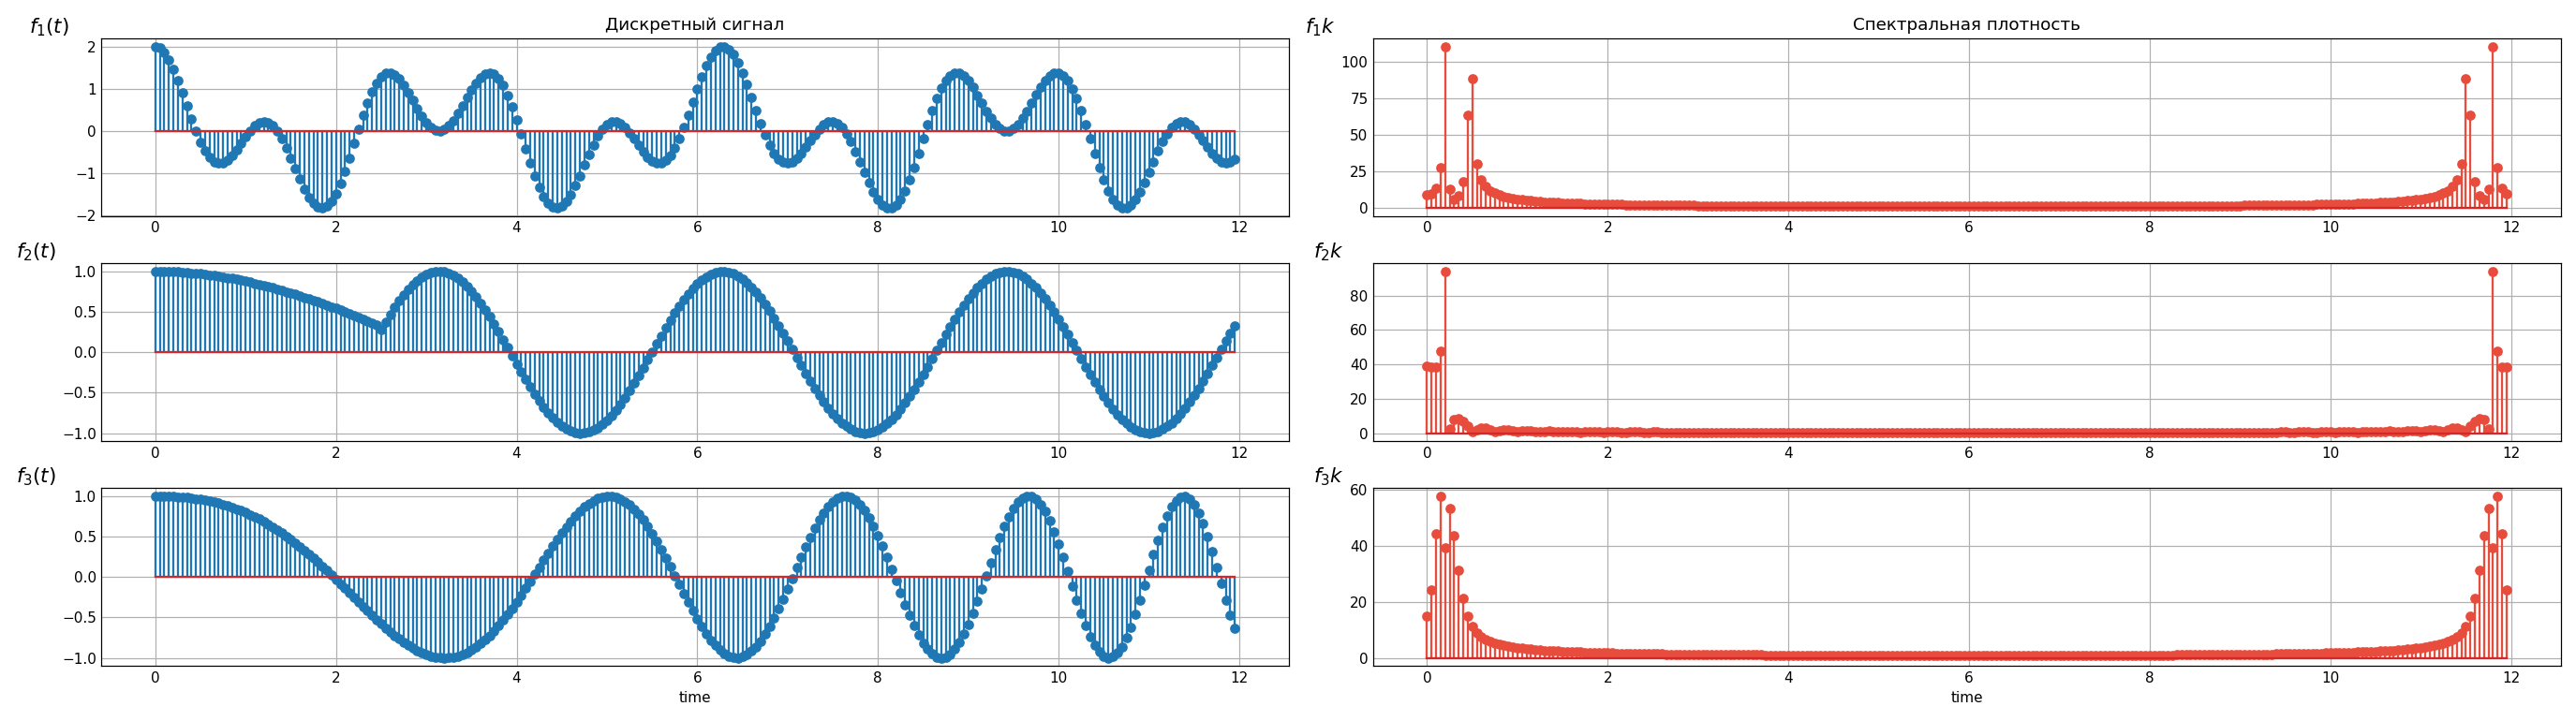

In [125]:
my_graphs(times, [f1, f2, f3], [f1k, f2k, f3k])

## Оконное Фурье-преобразование

$$ \hat{f}\bigl( \omega, t_0 \bigr) = \int\limits_{t_0 - T}^{t_0 + T} f(t) e^{-i\omega t} dt$$

### Постановка задачи

1) Получить формулу дискретного оконного Фурье-преобразования.

2) Построить ряд спектров для функции

$$f(t) = \bigl(1 - \Theta\bigl( t - t_* \bigr) \bigr) \cos\bigl(\omega_1 t\bigr) + \Theta\bigl( t - t_* \bigr)\cos\bigl(\omega_2 t\bigr)$$

   при различных $t_0$ и фиксированной ширины окна $2T$.

При применении оконного преобразования Фурье, с одной стороны, необходимо выбирать ширину окна $2T$ как можно меньшей, чтобы четко выявить момент появления или исчезновения той или иной частотной составляющей сигнала; с другой стороны, при этом падает разрешение метода в частотном диапозоне.

### Дискретное оконное Фурье-преобразование

Чтобы получить формулу дискретного оконного Фурье-преобразования необходимо сделать ряд преобразований:

- $f(t) \rightarrow f_n$;


- $\exp\bigl(-i\omega t \bigr) \rightarrow \exp\bigl(-i\omega n \Delta t \bigr)$;


- $\int\limits_{t_0 - T}^{t_0 + T} \rightarrow \sum\limits_{n=0}^{N} w\bigl(n - m \bigr), \text{ где } w(x) =
    \begin{cases}
     0 ,|x| > M = T \bigl/ \Delta t,\\ 
     1 ,|x| \leq M = T \bigl/ \Delta t
    \end{cases}$ 

Здесь $\Delta t$ $-$ это, шаг дискретизации.

Формула для дискретного оконного Фурье-преобразования

$$ \hat{f}\bigl( \omega, m \bigr) = \sum_{n=0}^{N} f_n \exp\bigl(-i\omega n \Delta t\bigr) w\bigl(n - m \bigr)$$

In [133]:
print(len(f2))
def discrete_windowed_transform(func, m, w=2):
    
    def window(n, m, M=80):
        return 0 if np.abs(n - m) > M else 1
    
    return np.sum([func[n] * np.exp(-1j * w * n) * window(n, m) for n in range(0, len(func))])

240


<IPython.core.display.Javascript object>


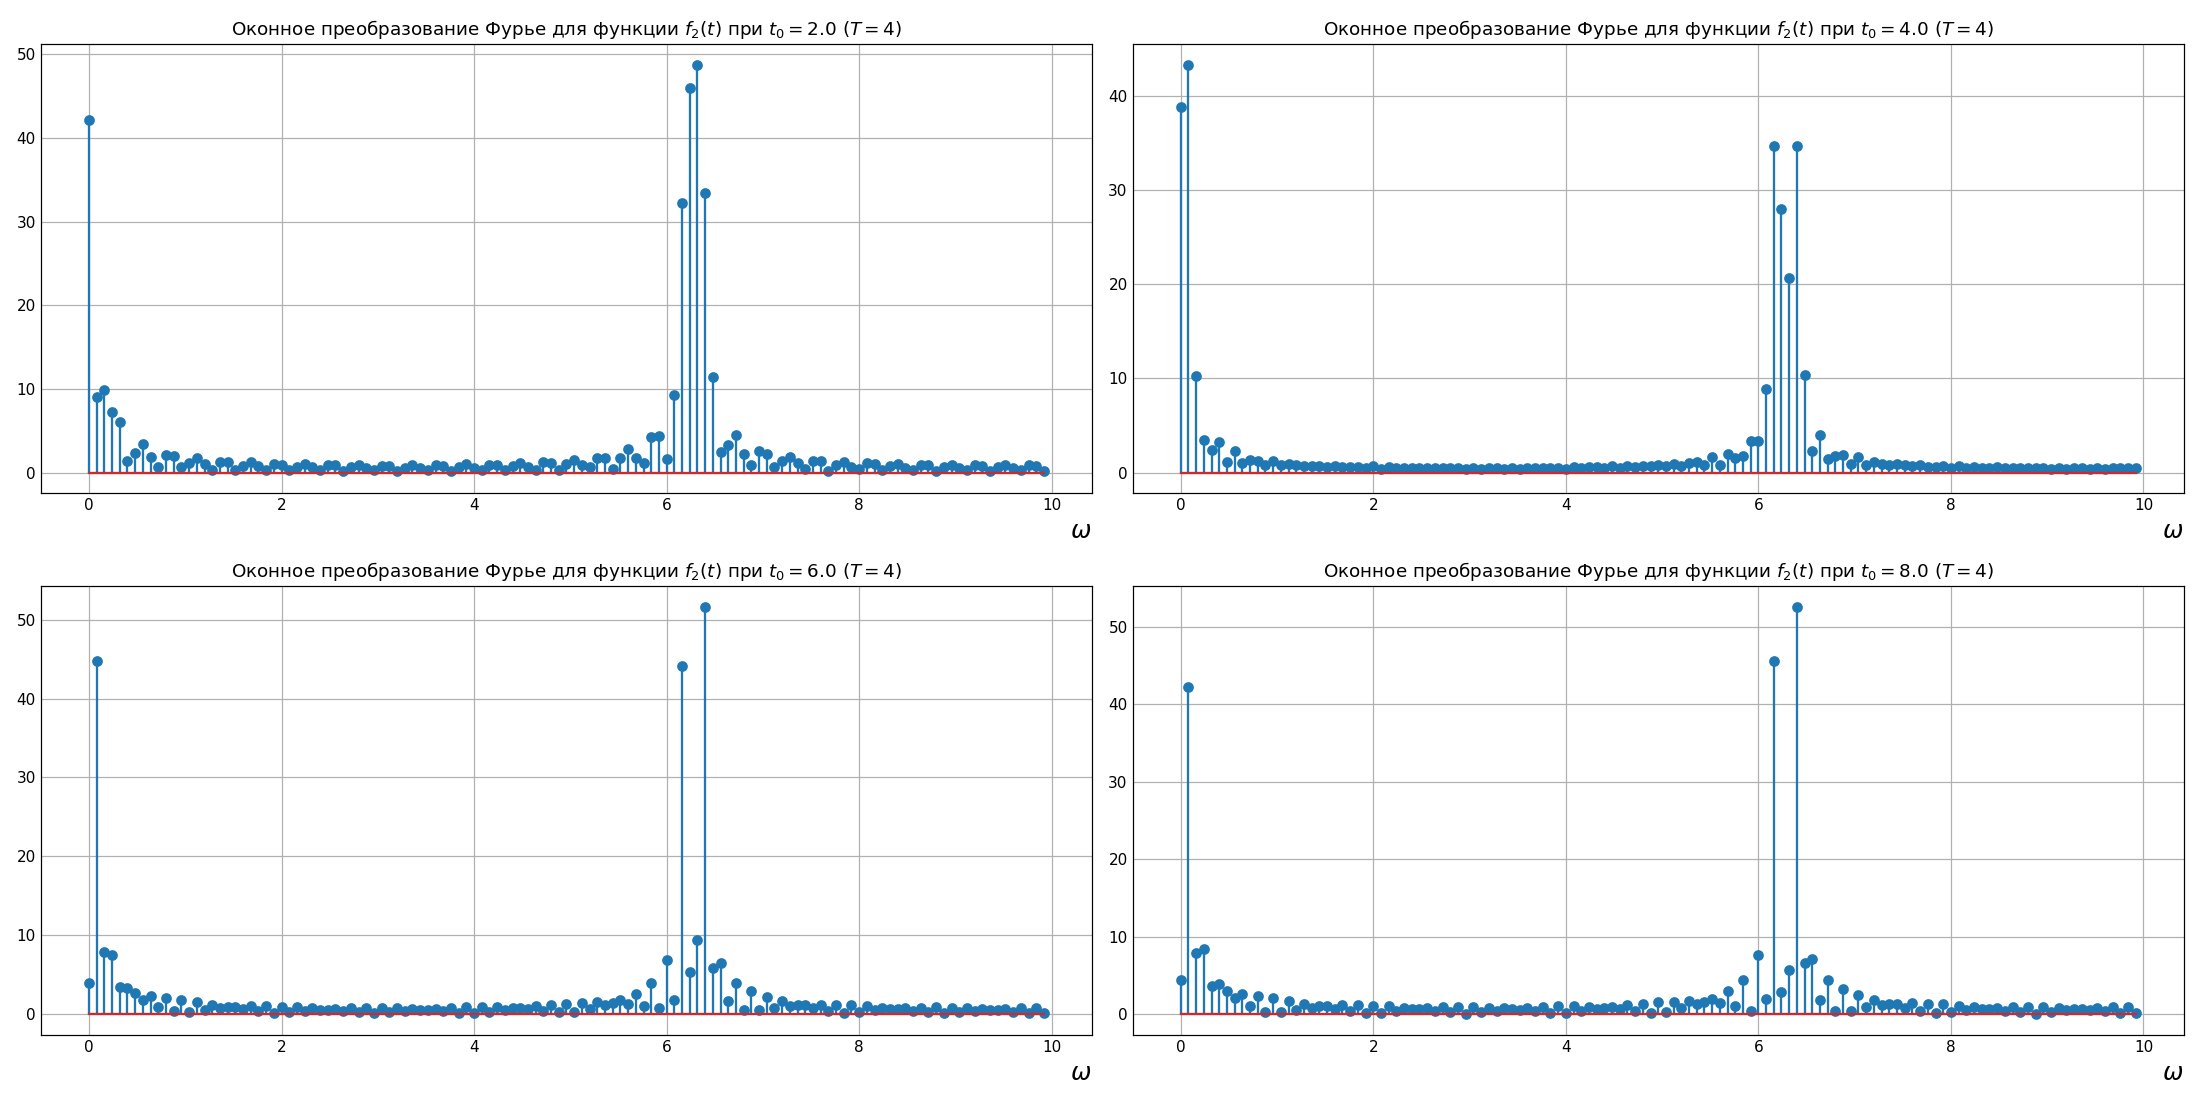

In [139]:
plt.style.use('_mpl-gallery')

fig, ax = plt.subplots(nrows=2, ncols = 2, figsize=(20, 10))
ws = np.arange(0, 10, 0.08)

for i, m in enumerate([[40, 80], [120, 160]]):

    funcl = np.array([discrete_windowed_transform(f2, m[0], w=w) for w in ws])
    funcr = np.array([discrete_windowed_transform(f2, m[1], w=w) for w in ws])

    ax[i, 0].stem(ws, np.abs(funcl))
    ax[i, 1].stem(ws, np.abs(funcr))
    
    ax[i, 0].set_title(f'Оконное преобразование Фурье для функции $f_2(t)$ при $t_0 = {m[0] * 0.05}$ ($T = 4$)')
    ax[i, 1].set_title(f'Оконное преобразование Фурье для функции $f_2(t)$ при $t_0 = {m[1] * 0.05}$ ($T = 4$)')

    ax[i, 0].set_xlabel('$\omega$', size=16, loc='right')
    ax[i, 1].set_xlabel('$\omega$', size=16, loc='right')
    #ax.set_ylabel('$\hat{f}$', size=16, rotation=0)
    
fig.tight_layout()
plt.show()

## Модификация Оконного Фурье-преобразования

Построение серии преобразований $\hat{f} \bigl( \omega, t_0, T \bigr)$:

- результаты оконного преобразования с малой шириной окна $2T$ используются для определения моментов времени $t_0$, когда происходят изменения спектрального состава сигнала;

- результаты оконного преобразования с большой шириной окна $2T$ $-$ для выделения соответствующих спектральных компонент $\omega$.

Свяжем ширину окна и частоту сигнала:

$$ \omega = \dfrac{2\pi n}{T},~ n \in \mathbb{R}:~~~~\hat{f}\bigl( \omega, t_0 \bigr) = \int\limits_{t_0 - T}^{t_0 + T} f(t) \exp \Bigl(-i \dfrac{2 \pi n}{T} t \Bigr) dt $$

- положение максимума $|\hat{f}\bigl(T, t_0 \bigr)|$ зависит от $n$;
- фаза заполнения непрерывно изменяется по мере сдвига окна вдоль оси времени;
- максимумы $|\hat{f}\bigl(T, t_0 \bigr)|$ для различных гармоник единичной амплитуды располагаются на параболе $T^2$.

## Непрерывное вейвлет-преобразование

$$ W\bigl( s, t_0 \bigr) = \int\limits_{-\infty}^{+\infty} f(t) \psi_{s, t_0}^{*}(t) dt,~~~~ \psi_{s, t_0}(t) = \dfrac{1}{\sqrt{s}}\psi_0 \Bigl(  \dfrac{t - t_0}{s} \Bigr),$$

где $\psi_{s, t_0}(t)$ $-$ вейвлетная функция, $\psi_0 (t)$ $-$ материнский вейвлет, $s$ $-$ масштаб вейвлетного преобразования, $t_0$ $-$ параметр сдвига.

Построить скалограммы для дискретизированных сигналов на основе прошлых функций и сигнала динамической системы из [лабораторной работы №1](https://github.com/AlexeyMakurin/Computer-technologies-in-physics/blob/main/RW_laboratory_work_1.ipynb).

In [140]:
def wavelet(basic_wavelet, s, t0, t):
    return basic_wavelet((t - t0) / s) / np.sqrt(s)

In [141]:
def wavelet_transform(signal, basic_wavelet, t0_max=5, s_max=2):
    
    time = np.arange(-1000, 1000, 2e-3)
    
    s_list = np.arange(1e-10, s_max, 0.05)
    t0_list = np.arange(0, t0_max, 0.05)
    
    result = np.array([
        np.trapz(y=[ signal(time) * wavelet(basic_wavelet, s , t0, time) for s in s_list], x=time, axis=1) 
        for t0 in t0_list]) 
        
    
    return result.T, s_list, t0_list

### Примеры материнских вейвлетов

#### WAVE-вейвлет

$$\psi \bigl(t\bigr) = t e^{-t^{2} / 2} $$

In [142]:
def wave(t):
    return t * np.exp(-0.5 * t**2)

#### MHAT-вейвлет

$$\psi \bigl(t\bigr) = \bigl( 1 - t^2 \bigr) e^{-t^{2} / 2 }$$

In [143]:
def mhat(t):
    return (1 - t**2) * np.exp(-0.5 * t**2)

#### Вейвлет Морле

$$\psi \bigl(t\bigr) = \pi^{-1/4}\Bigl( e^{i2\pi f_{0} t} - e^{-(i2\pi f_{0})^2 / 2} \Bigr) e^{-t^{2}/2}, $$


где $f_0$ $-$ параметр, называемый центральной частотой. 

In [144]:
def morle(t, f0 = 1):
    a = 1j * 2 * np.pi * f0
    return (np.exp(a * t) - np.exp(-0.5 * (a)**2)) * np.exp(-0.5 * t**2) / np.pi**(0.25)

### Пример

 Рассмотрим гармоническую функцию $\sin (5t)$ на основе вейвлета WAVE. 

In [145]:
def sin(x):
    return np.sin(5 * x)

<IPython.core.display.Javascript object>


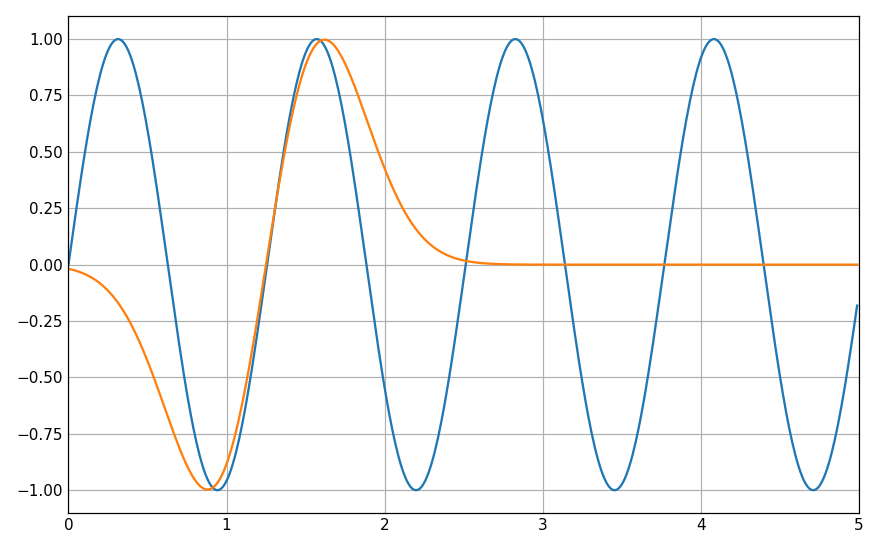

In [146]:
plt.style.use('_mpl-gallery')

fig, ax = plt.subplots(figsize=(8, 5))

time = np.arange(0, 5, 0.01)

ax.plot(time, np.sin(5 * time))
ax.plot(time, wavelet(wave, 0.37, 1.25, time))

ax.set_xlim(0, 5)

fig.tight_layout()
plt.show()

Из графика видно, что вейвлет демонстрирует ту же "периодичность", что и сам сигнал. Параметры $s$ и $t0$ выбраны таким образом, чтобы достичь максимального совпадения "накладываемых" друг на друга функций. Что приводит к большей корреляции между сигналом и вейвлет преобразованием.

Сформируем вейвлет преобразование

In [ ]:
res, s_, t0_ = wavelet_transform(sin, wave, t0_max=2, s_max=0.9)

В качестве результата анализа сигнала на основе WAVE-вейвлета построим скалограмму

In [147]:
def scalogram(x, y, z):
    plt.style.use('_mpl-gallery-nogrid')

    X, Y = np.meshgrid(x, y)
    Z = z

    # plot
    fig, ax = plt.subplots(figsize=(10.5, 5))

    pcm = ax.pcolormesh(X, Y, Z, cmap='magma')
    fig.colorbar(pcm, ax=ax)
    fig.tight_layout()
    plt.show()

<IPython.core.display.Javascript object>


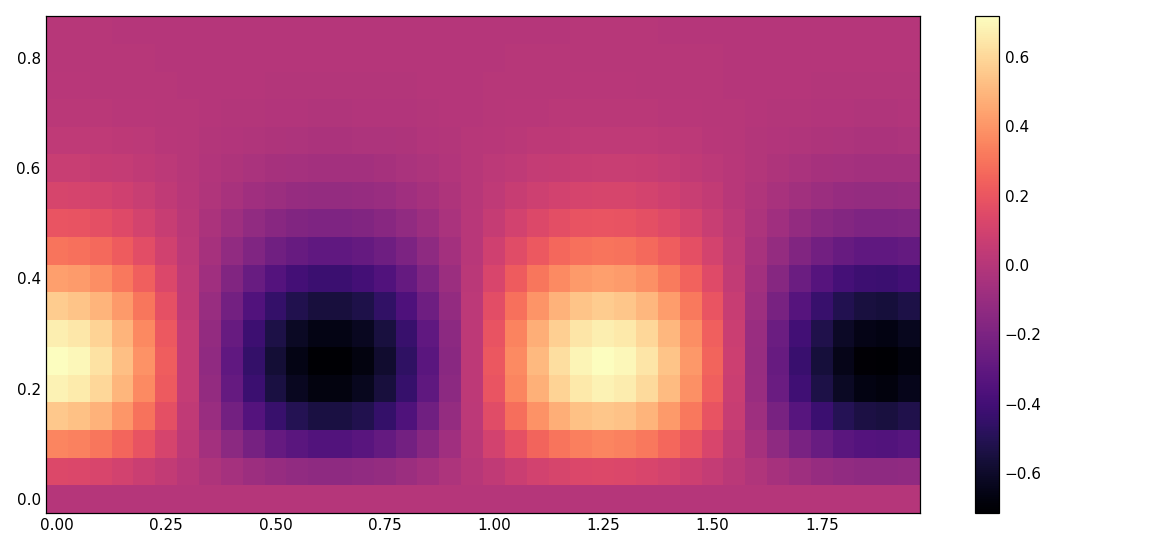

In [153]:
scalogram(t0_, s_, res)

<IPython.core.display.Javascript object>


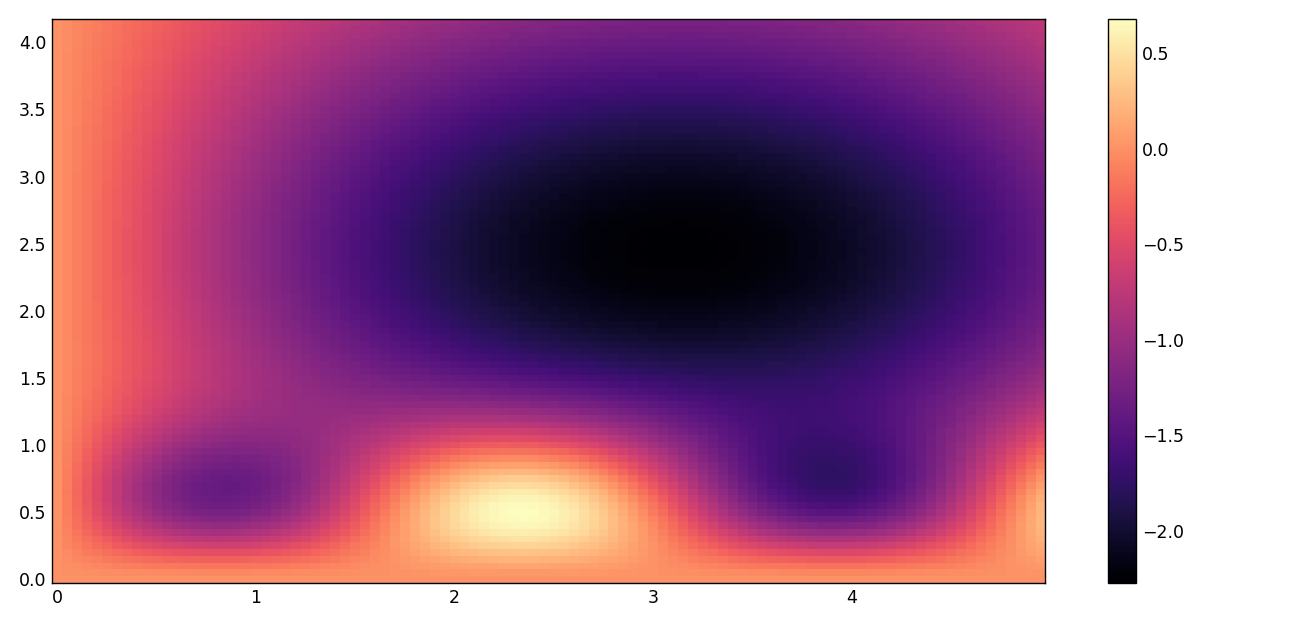

In [241]:
z, y, x = wavelet_transform(func_1, wave, t0_max=5, s_max=4.2)
scalogram(x, y, z)

<IPython.core.display.Javascript object>


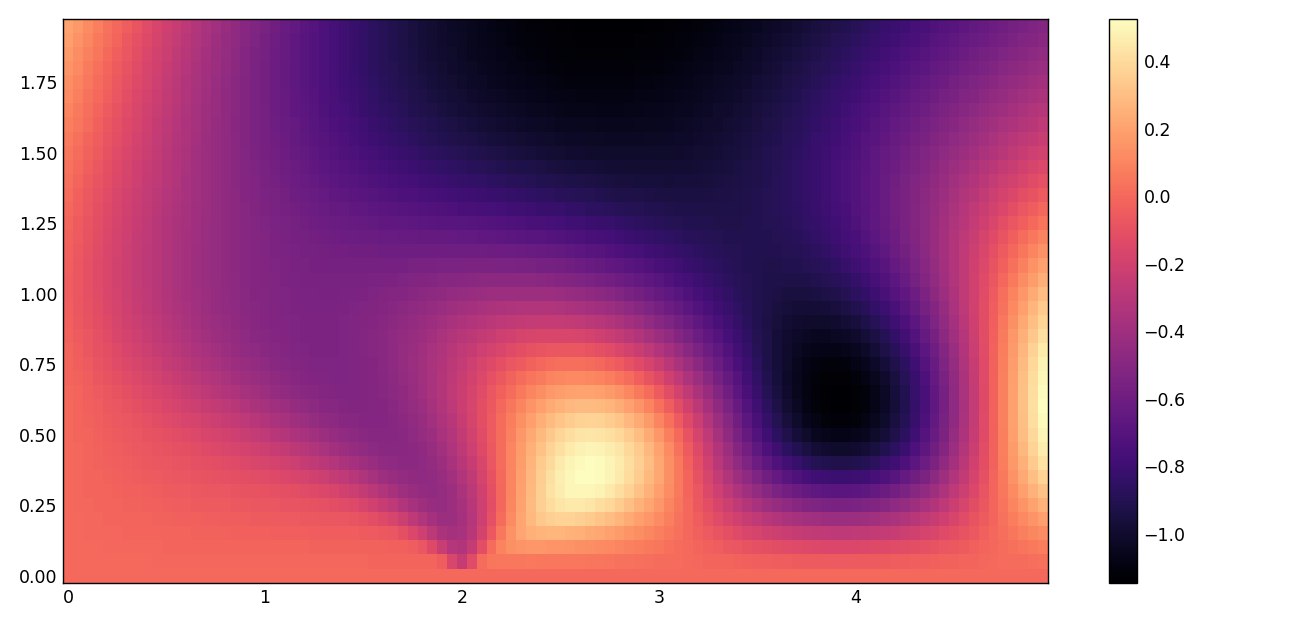

In [242]:
z, y, x = wavelet_transform(func_2, wave, t0_max=5, s_max=2)
scalogram(x, y, z)

<IPython.core.display.Javascript object>


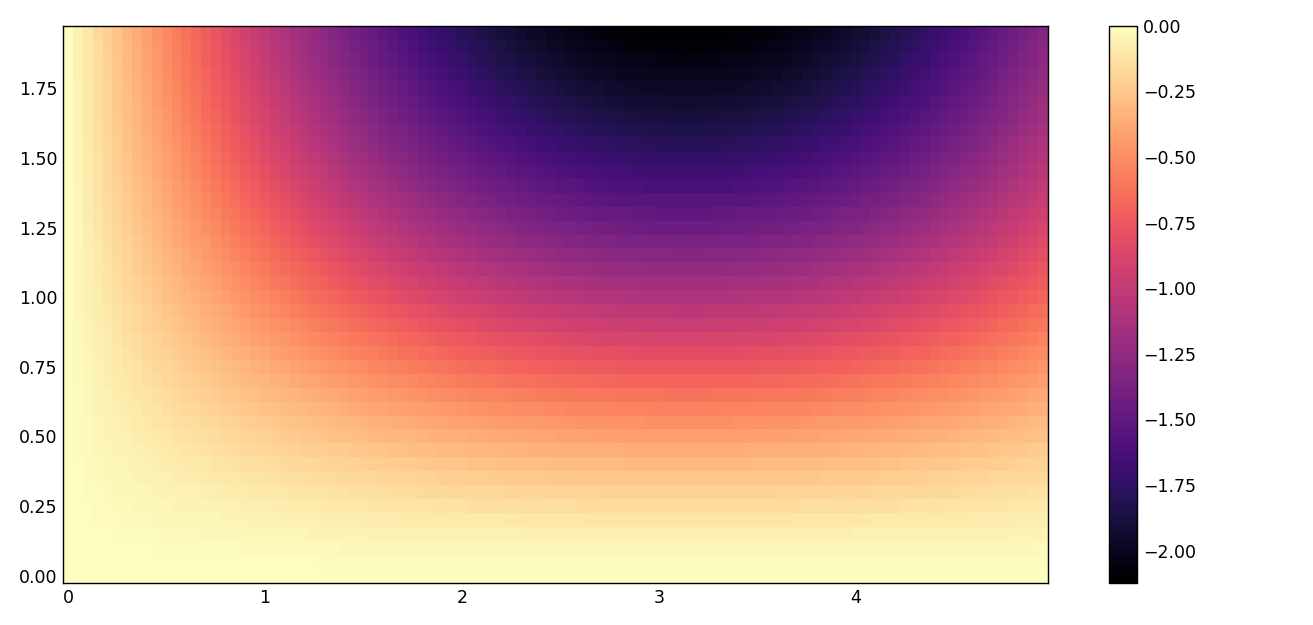

In [243]:
z, y, x = wavelet_transform(func_3, wave, t0_max=5, s_max=2)
scalogram(x, y, z)

In [284]:
df_morris_lecar = pd.read_csv("morris-lecar.csv")
df_morris_lecar

,Unnamed: 0,time,membrane potential,recovery variable,external current
0,0,0.00,-52.140000,0.020000,-0.155961
1,1,0.01,-52.139799,0.020005,0.024695
2,2,0.02,-52.139418,0.020010,-0.072668
3,3,0.03,-52.139134,0.020015,-2.471735
4,4,0.04,-52.141238,0.020020,1.449199
...,...,...,...,...,...
19995,19995,199.95,-52.169938,0.030002,0.457681
19996,19996,199.96,-52.169465,0.030002,1.623485
19997,19997,199.97,-52.167832,0.030002,-2.285696
19998,19998,199.98,-52.170089,0.030002,0.418717


<IPython.core.display.Javascript object>


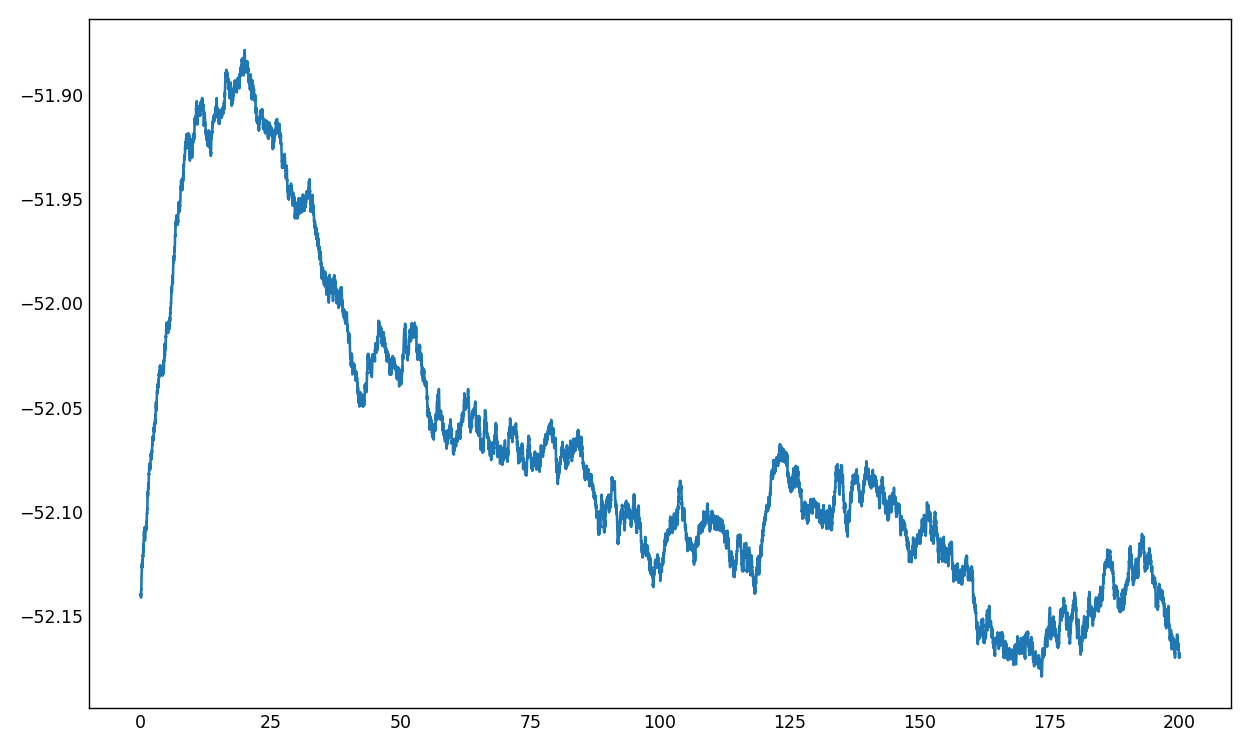

In [309]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(df_morris_lecar["time"], df_morris_lecar["membrane potential"])

fig.tight_layout()
plt.show()

In [287]:
s_list = np.arange(1e-10, 3, 0.05)
t0_list = np.arange(0, 100, 0.05)
    
result = np.array([
    np.trapz(y=[ df_morris_lecar["membrane potential"] * wavelet(wave, s , t0, df_morris_lecar["time"]) 
                for s in s_list], x=df_morris_lecar["time"], axis=1) for t0 in t0_list])

<IPython.core.display.Javascript object>


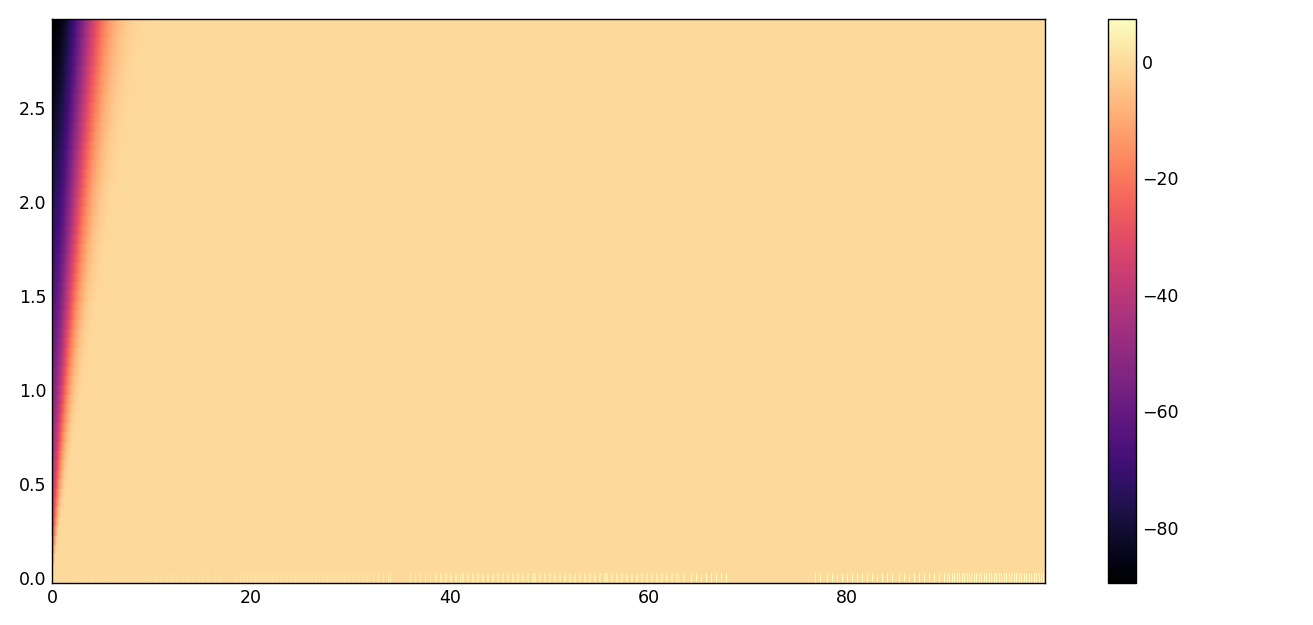

In [288]:
scalogram(t0_list, s_list, result.T)